# Importing Data, Plotting, and Changing CRS

In this notebook, we'll walk through some basics of [Pandas](https://pandas.pydata.org/), [Geopandas](http://geopandas.org/), and displaying your data with [MatPlotLib](https://matplotlib.org/).

Start by importing pandas, geopandas, and matplotlib:

    >>> import pandas as pd
    >>> import geopandas as gpd
    >>> import matplotlib.pyplot as plt
    >>> import os

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

It is important that we reset our working directory to the home folder. Use os.chdir() to move back one directory.

##### Important: only run this once or you'll wind up in the wrong directory.

    >>> os.chdir('../')
    >>> os.getcwd()

In [5]:
os.chdir('../')
os.getcwd()

'/home/jupyter-phwh9568'

#### You can import a file using gpd.read_file()... 

    >>> gpd.read_file('Data/Boulder_Co.shp')

In [6]:
gpd.read_file('Data/Boulder_Co.shp')

,PK_UID,COUNTY,CO_FIPS,POP_2000,HOUSEHO_00,SHAPE_Leng,SHAPE_Area,geometry
0,4,BOULDER,13,291288.0,114680.0,221747.619148,1.917501e+09,"MULTIPOLYGON (((478701.282 4456950.499, 479375..."


#### Create a variable out of the Boulder County shapefile:

    >>> county = gpd.read_file('Data/Boulder_Co.shp')

In [7]:
county = gpd.read_file('Data/Boulder_Co.shp')

#### Now, you can just call the variable and if you want to view it:

    >>> county

In [8]:
county

,PK_UID,COUNTY,CO_FIPS,POP_2000,HOUSEHO_00,SHAPE_Leng,SHAPE_Area,geometry
0,4,BOULDER,13,291288.0,114680.0,221747.619148,1.917501e+09,"MULTIPOLYGON (((478701.282 4456950.499, 479375..."


#### Now, we'll use the MatPlotLib plot function to display the geometry of the shapefile:
    >>> county.plot()

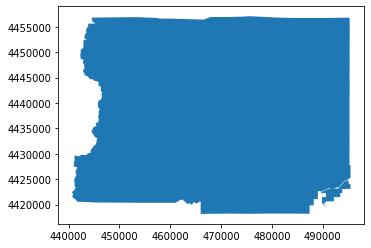

In [9]:
county.plot()

#### You can enter parameters between the parentheses. Let's change the color of Boulder County to green:
    >>> county.plot(color='green')

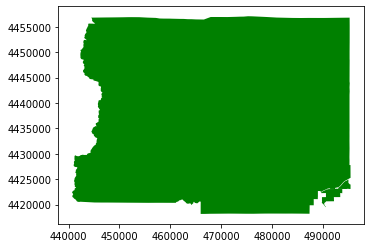

In [10]:
county.plot(color='green')

#### You can change more than color... 
    >>> county.plot(color='green', edgecolor='black', alpha=0.5, figsize=(10,10))

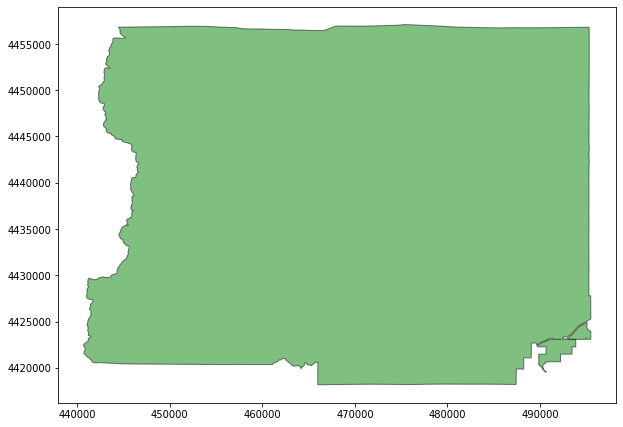

In [11]:
county.plot(color='green', edgecolor='black', alpha=0.5, figsize=(10,10))

#### Not bad!  

#### What coordinate reference system is this data in? We can check it using the .crs:
    >>> county.crs

In [12]:
county.crs

{'init': 'epsg:26913'}

##### Pro tip: go to https://spatialreference.org/ to check all the different epsg codes.  

#### Now, let's read in another file, the Boulder City Limits shapefile: 
    >>> city = gpd.read_file('Data/City_Limites.shp')
    >>> city


In [13]:
city = gpd.read_file('Data/City_Limits.shp')
city

,OBJECTID,TYPE,SHAPEAREA,SHAPELEN,geometry
0,26,City,2.092505e+07,34856.338250,"POLYGON ((-105.26349 40.08020, -105.26347 40.0..."
1,25,City,8.103168e+04,1661.732555,"POLYGON ((-105.21128 40.01726, -105.21099 40.0..."
2,24,City,4.062025e+07,64671.109443,"POLYGON ((-105.18891 40.07596, -105.18899 40.0..."
3,2,City,6.295215e+08,299444.754744,"POLYGON ((-105.21457 40.00805, -105.21457 40.0..."
4,23,City,7.137964e+07,45960.606599,"POLYGON ((-105.19103 40.08976, -105.19214 40.0..."


There are five polygons representing the city limits.  

Use len to check how many rows there are in a Pandas/GeoPandas dataframe: 

    >>> len(city)

In [14]:
len(city)

5

#### Plot it with the .plot() function:
    >>> city.plot()

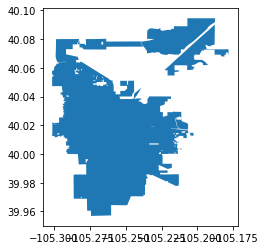

In [15]:
city.plot()

#### Let's take a minute to understand indexing in Python. Type in the following and view the different results.
    >>> city[0:5]
    >>> city[0:]
    >>> city[1:3]
    >>> city[:5]
    >>> city[:-2]

In [16]:
city[0:5]

,OBJECTID,TYPE,SHAPEAREA,SHAPELEN,geometry
0,26,City,2.092505e+07,34856.338250,"POLYGON ((-105.26349 40.08020, -105.26347 40.0..."
1,25,City,8.103168e+04,1661.732555,"POLYGON ((-105.21128 40.01726, -105.21099 40.0..."
2,24,City,4.062025e+07,64671.109443,"POLYGON ((-105.18891 40.07596, -105.18899 40.0..."
3,2,City,6.295215e+08,299444.754744,"POLYGON ((-105.21457 40.00805, -105.21457 40.0..."
4,23,City,7.137964e+07,45960.606599,"POLYGON ((-105.19103 40.08976, -105.19214 40.0..."


#### You can use index for a lot of things, including plotting:
    >>> city[1:3].plot()

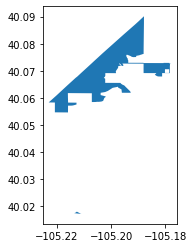

In [17]:
city[1:3].plot()

#### Now let's plot both layers on top of one another.

Start by making the county variable the plot "axis", then plot city using county as the axis...  

    >>> ax = county.plot()
    >>> city.plot(ax=ax)

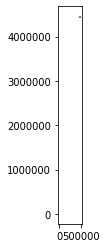

In [18]:
ax = county.plot()
city.plot(ax=ax)

### Hmm... what went wrong? 

start by checking city's crs...

    >>> city.crs

In [19]:
city.crs

{'init': 'epsg:4326'}

#### Ah ha. Not in the same projection as the county layer. But we can easily reset it to the county variable's crs:

    >>> city = city.to_crs(county.crs)
    >>> city.crs

In [20]:
city = city.to_crs(county.crs)
city.crs

{'init': 'epsg:26913'}

#### Okay! Now that both layers are in the same crs, we can try plotting again:

    >>> ax = county.plot()
    >>> city.plot(ax=ax)

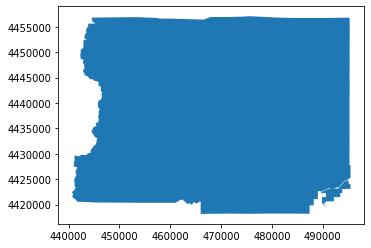

In [22]:
ax = county.plot()
city.plot(ax=ax)

#### It worked, but they're all the same color. So, let's work on changing the styling parameters:

    >>> ax = county.plot(color='green', edgecolor='black', alpha=0.5, figsize=(10,10))
    >>> city.plot(ax=ax, color='none', edgecolor='white')

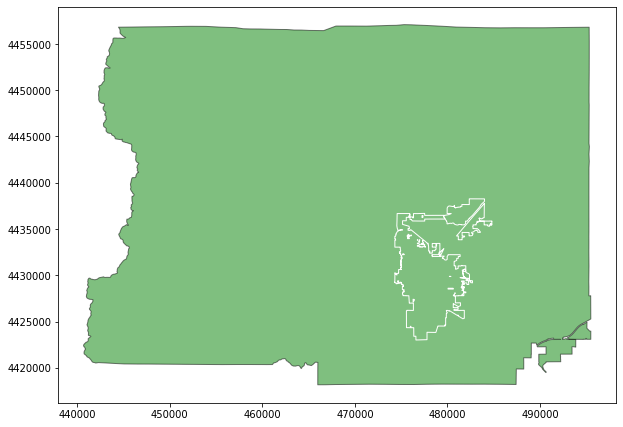

In [23]:
ax = county.plot(color='green', edgecolor='black', alpha=0.5, figsize=(10,10))
city.plot(ax=ax, color='none', edgecolor='white')

#### Nice job!